<a href="https://colab.research.google.com/github/deenadayalanai/Machine-Learning-Foundations/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segment 1: Frequentist Statistics

In [63]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
np.random.seed(42)

**Quick revison of important topics**

## Measures of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

In [65]:
x = st.skewnorm.rvs(10, size=1000)

In [66]:
x[0:20]

array([0.63349013, 0.04557363, 0.65040763, 1.45109873, 0.1635155 ,
       0.19382172, 1.66045054, 0.82682805, 0.36271008, 0.48660953,
       0.33003223, 0.44375653, 0.44725763, 1.97236175, 1.54362254,
       0.53980414, 1.07262315, 0.26453934, 0.93539347, 1.36308862])

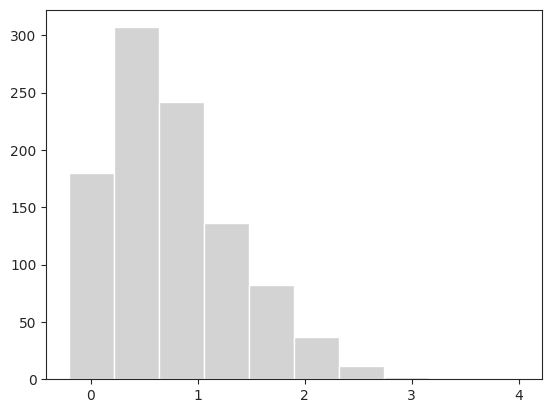

In [67]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightgray')

### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [68]:
xbar = x.mean()
xbar

0.7719211854654121

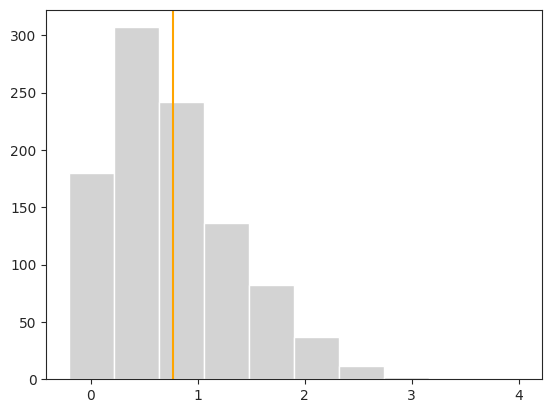

In [69]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'lightgray')

### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution:

In [70]:
np.median(x)

0.651420257427958

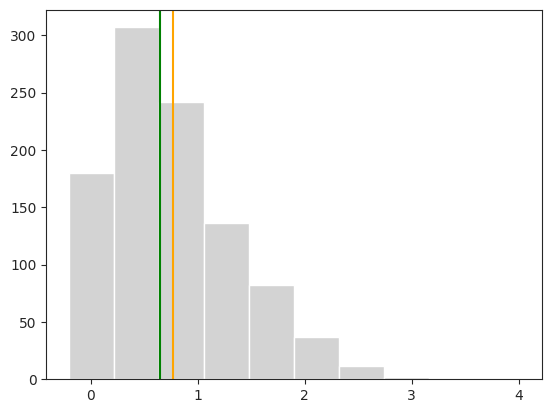

In [71]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

The **mode** is least impacted by skew, but is typically only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

## Measures of Dispersion

Standard deviation measures how far apart numbers are in a data set. Variance, on the other hand, gives an actual value to how much the numbers in a data set vary from the mean. Standard deviation is the square root of the variance and is expressed in the same units as the data set.


### Variance

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [72]:
x.var()

0.35528419278021617

### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution:
$$ \sigma = \sqrt{\sigma^2} $$

In [73]:
x.var()**(1/2)

0.5960572059628305

In [74]:
sigma = x.std()
sigma

0.5960572059628305

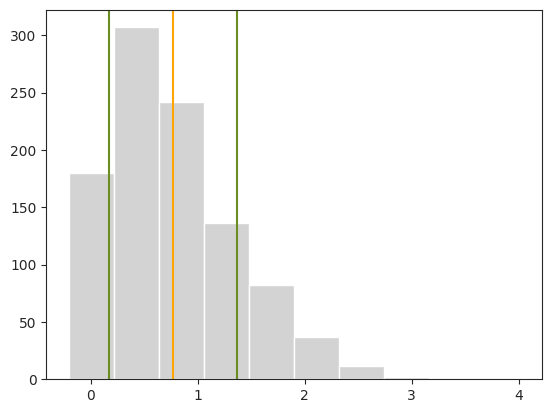

In [75]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [76]:
sigma/(x.size)**(1/2)

0.018848983865986414

In [77]:
st.sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML

0.018858415432183823

In [78]:
st.sem(x, ddof=0)

0.018848983865986414

Standard error enables us to compare whether the means of two distributions differ *significantly*

## Gaussian Distribution

After Carl Friedrich Gauss. Also known as **normal distribution**:

In [79]:
x = np.random.normal(size=10000)

In [80]:
sns.set_style('ticks')

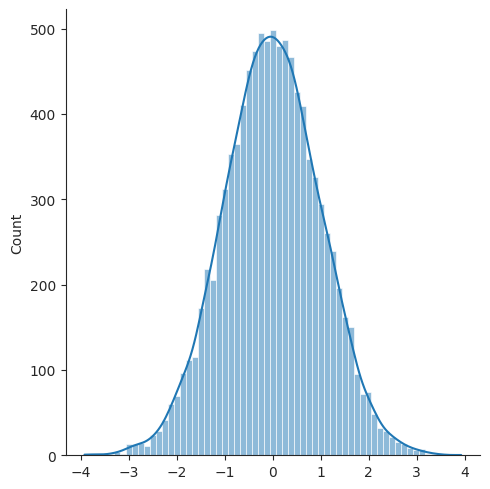

In [81]:
_ = sns.displot(x, kde=True)



When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [82]:
x.mean()

-0.01626305454909193

In [83]:
x.std()

1.0039756140435032

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance).  
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept.

## The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [84]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.10069587,  1.35557294,  0.66536894, -3.17042574,  0.43948605,
        0.53629091, -1.04552949, -0.99434937, -0.74023225, -0.54129909])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [85]:
x_sample.mean()

-0.35958129882198664

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [86]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

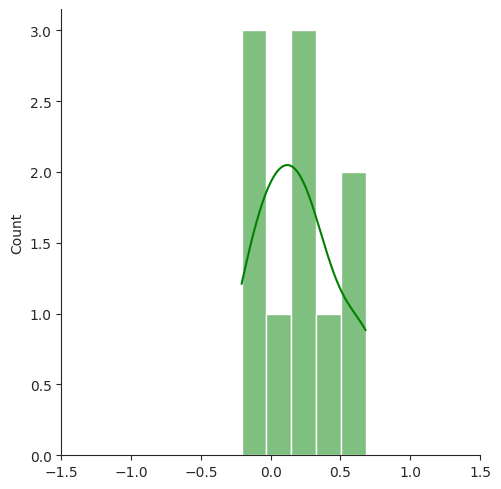

In [87]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed:

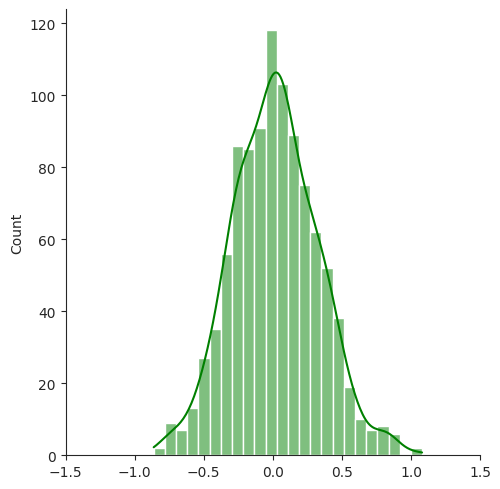

In [88]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

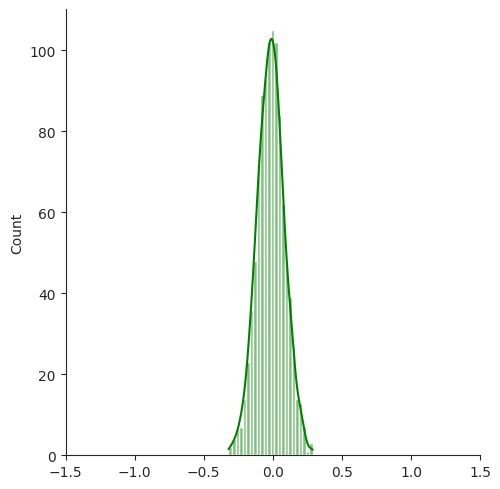

In [89]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

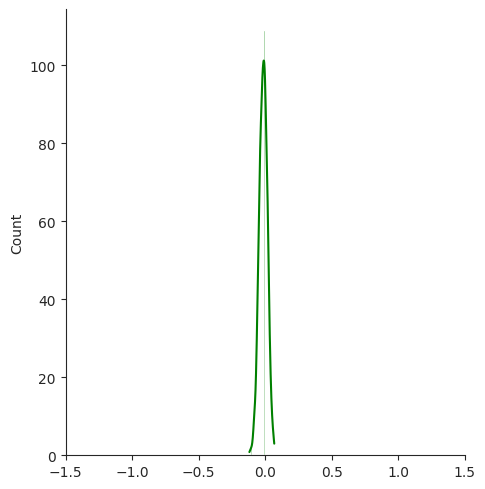

In [90]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

### Sampling from a skewed distribution

In [91]:
s = st.skewnorm.rvs(10, size=10000)

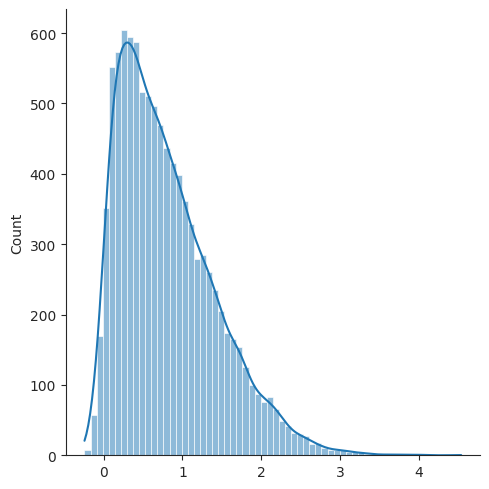

In [92]:
_ = sns.displot(s, kde=True)

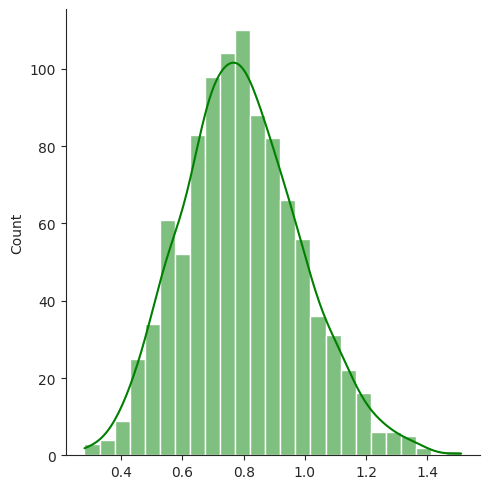

In [93]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

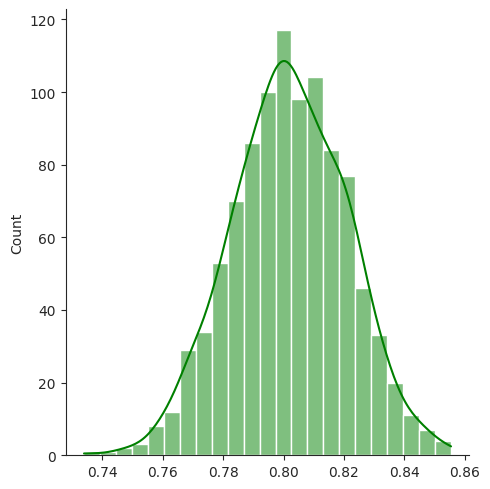

In [94]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

### Sampling from a multimodal distribution

In [95]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

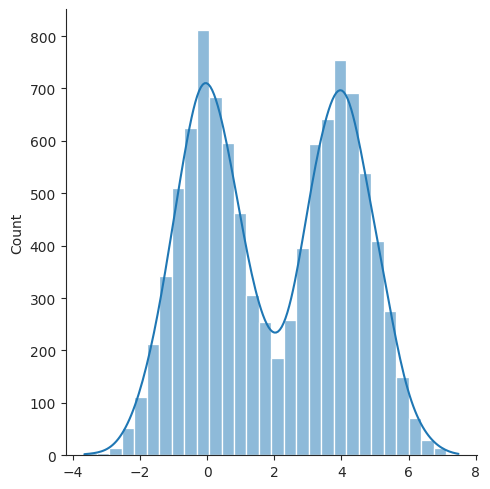

In [96]:
_ = sns.displot(m, kde=True)

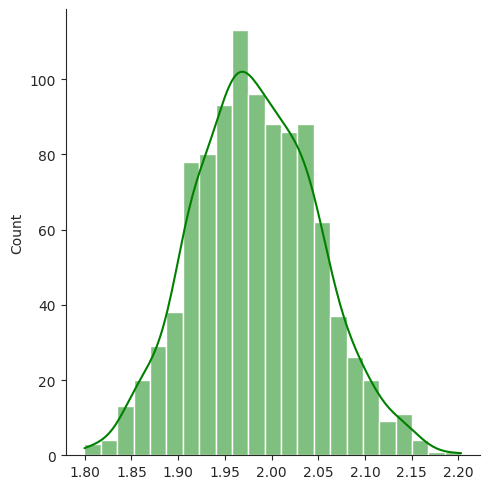

In [97]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

### Sampling from uniform

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal:

In [98]:
u = np.random.uniform(size=10000)

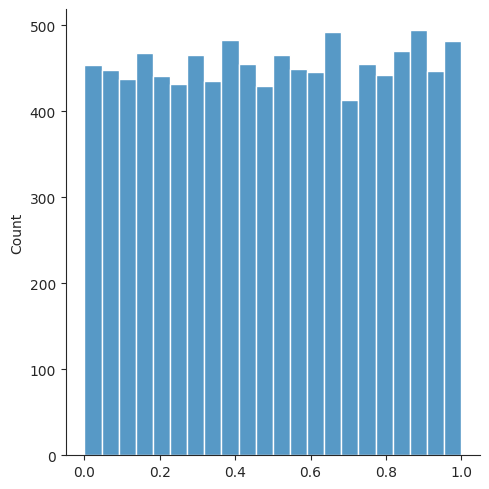

In [99]:
_ = sns.displot(u)

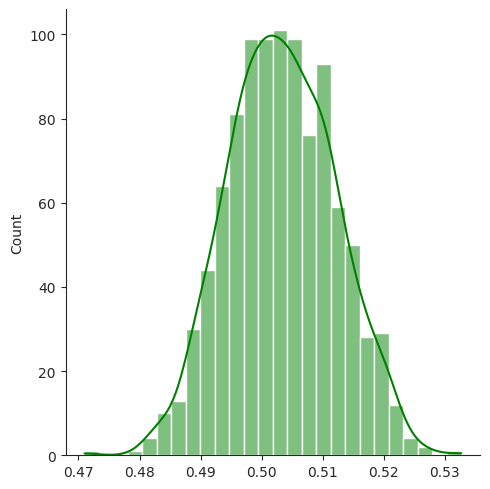

In [100]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" (covered shortly in *Statistics*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not.

## z-scores

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is:
$$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered in *Probability & Information Theory*, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [101]:
x_i = 85
mu = 60
sigma = 10

In [102]:
x = np.random.normal(mu, sigma, 10000)

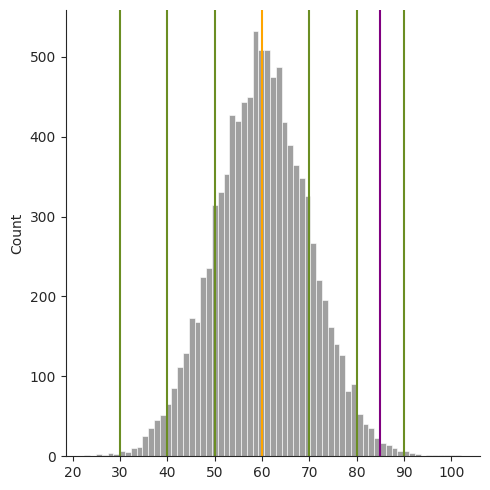

In [103]:
sns.displot(x, color='gray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations above the mean:

In [106]:
z = (x_i - mu)/sigma
z

2.5

Or using our simulated class of 10k CS101 students:

In [107]:
z = (x_i - np.mean(x))/np.std(x)
z

2.5063103401632336

Less than one percent of the class outperformed you:

In [108]:
len(np.where(x > 85)[0])

69

In [109]:
100*69/10000

0.69

In [110]:
np.percentile(x, 99)

83.35787058294662

In contrast, if the mean score of your peers is 90 and the standard deviation is 2:

In [112]:
mu = 90
sigma = 2

In [113]:
y = np.random.normal(mu, sigma, 10000)

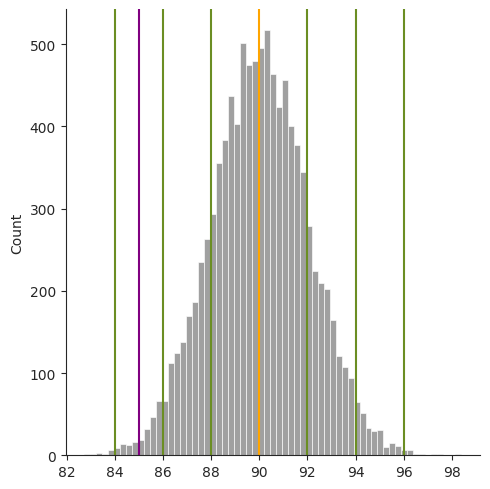

In [114]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations *below* the mean (!):

In [115]:
z = (x_i - mu)/sigma
z

-2.5

Or using our simulated class of 10k CS101 students:

In [116]:
z = (x_i - np.mean(y))/np.std(y)
z

-2.479852596293303

In which case, over 99% of the class outperformed you:

In [118]:
len(np.where(y > 85)[0])

9933

In [119]:
100*9933/10000

99.33

A mere 67 folks attained worse:

In [121]:
10000-9933

67

In [122]:
np.percentile(y, 1)

85.3781445632019

A frequentist convention is to consider a data point that lies further than three standard deviations from the mean to be an **outlier**.

It's a good idea to individually investigate outliers in your data as they may represent an erroneous data point (e.g., some data by accident, a data-entry error, or a failed experiment) that perhaps should be removed from further analysis (especially, as outliers can have an outsized impact on statistics including mean and correlation). It may even tip you off to a major issue with your data-collection methodology or your ML model that can be resolved or that you could have a unit test for.

**Exercises**

1. You clean and jerk 100kg in a weightlifting competition. The mean C&J weight at the competition is 100kg. What's your z-score for the C&J?
2. You snatch 100kg in the same competition. The mean snatch weight is 80kg with a standard deviation of 10kg. What's your z-score for the snatch?
3. In olympic weightlifting, your overall score is the sum total of your C&J and snatch weights. The mean of these totals across competitors is 180kg with a standard deviation of 5kg. What's your overall z-score in the competition?



**Solutions**
1. zero
2. two
3. four (you may have won the meet!)

## *p*-values

These quantify the *p*robability that a given observation would occur by chance alone.

For example, we saw above that with our simulated 10k exam results, only 69 folks attained a *z*-score above 2.5 and only 67 (=10000-9993) attained a *z*-score below -2.5. Thus, if we were to randomly sample one of the 10k CS101 exam results, we would expect it to be outside of 2.5 (i.e., +/- 2.5) standard deviations only 1.36% of the time:
$$ \frac{69+67}{10000} = 0.0136 = 1.36\% $$

Equivalent to increasing our CS101 class size from 10k toward infinity, the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's *cumulative distribution function* (CDF):

In [137]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

In [138]:
p_below*10000

62.096653257761325

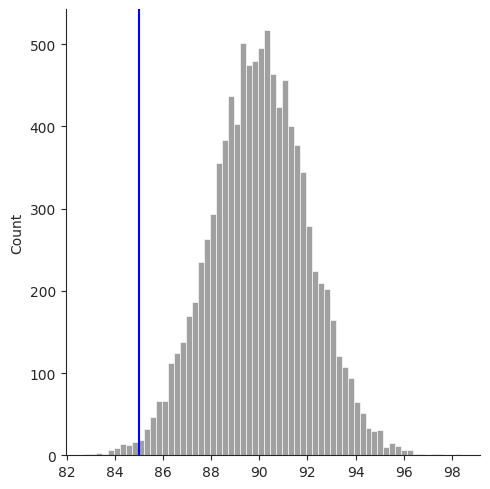

In [131]:
sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [135]:
p_above = st.norm.cdf(2.5)

In [139]:
p_above = 1-st.norm.cdf(2.5)
p_above

0.006209665325776159

In [140]:
p_above*10000

62.09665325776159

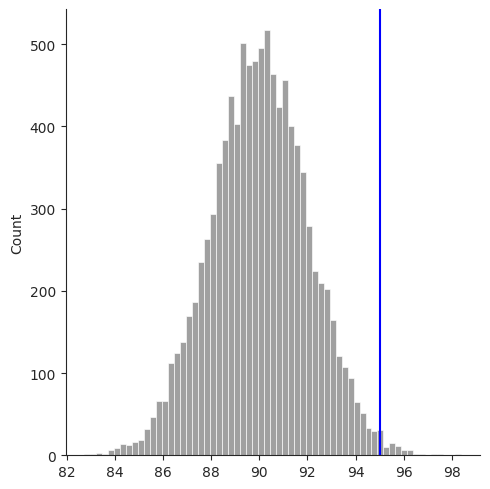

In [141]:
sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [145]:
p_outside = p_below + p_above
p_outside

0.01241933065155229

In [146]:
p_outside*10000

124.1933065155229

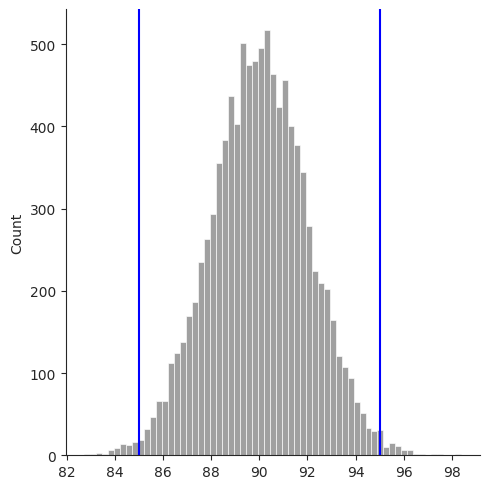

In [147]:
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')